## Fetch the Dataset

In [1]:
! git clone https://github.com/premnagdeo/Malware-Detection.git
% cd Malware-Detection

fatal: destination path 'Malware-Detection' already exists and is not an empty directory.
/content/Malware-Detection


In [2]:
!pip install scikit-learn==0.23.2

## Import Libraries

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt

import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

##Load the Dataset

In [4]:
dataset = pandas.read_csv('data.csv',sep='|', low_memory=False)

### Exploring the Dataset

In [5]:
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [6]:
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,138047.000000,1.380470e+05,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,2.213743e+05,5.350876e+14,7.323764e+03,694.386694,5.097843,1.092983,68.751983,64.851283,4.861895,1.444602,8.159750e+05,1297.876520,1.797959e+08,2.157403,22312.125283,9.302477e+05,5.445543e+03,1.031958e+06,3.429882e+04,3.608506e+04,7.908762e+04,4.994509,4.637599,2.259625,6.958913,1.871513e+05,1.956488e+04,6.506805e+05,1.884237e+05,2.109837e+04,6.349808e+05,5.462937,113.225648,4.338341,23.674263,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,2.188020e+06,9.929589e+16,6.257687e+05,1289.921098,99.220192,77.551077,1185.886042,1139.691397,0.647720,181.180393,6.530065e+06,5595.523021,5.976192e+08,0.452940,15440.574817,5.550081e+05,1.804724e+04,1.817744e+05,7.906877e+06,8.904748e+06,1.466901e+07,1.915329,1.099464,1.831893,1.044297,7.735218e+06,3.540868e+05,3.007226e+07,4.180153e+06,3.543141e+05,1.285463e+07,4.362811,123.134704,34.776745,252.093958,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.553600e+04,1.600000e+01,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,448.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000,0.000000,0.000000,0.000000,6.400000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,2.867200e+04,4.194304e+06,4.096000e+03,512.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.843200e+05,1024.000000,1.065765e+05,2.000000,320.000000,1.048576e+06,4.096000e+03,1.048576e+06,4.096000e+03,0.000000e+00,1.600000e+01,4.000000,4.001088,0.020393,6.417698,1.868800e+04,5.120000e+02

In [7]:
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

Here 0 = "Malicious" and 1 = "Legitimate"

#### We do not require the name and md5 digest, hence they are dropped

Declaring the input variables x and output labels y

In [8]:
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values

### Split Data into Train and Test Set

Train:Test Split = 80:20

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, shuffle=True)

In [10]:
print("Number of samples in Training Set =", X_train.shape[0])
print("Number of samples in Test Set =", X_test.shape[0])

Number of samples in Training Set = 110437
Number of samples in Test Set = 27610


In [11]:
forest = ek.RandomForestClassifier(n_estimators=100, oob_score=True,)
forest.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

## Evaluation of the classifier

In [12]:
score = forest.score(X_test,y_test)
print("Random Forest Accuracy:", score)

Random Forest Accuracy: 0.9950742484607027


Test for false positives and false negatives

In [13]:
predicted = forest.predict(X)
matrix = confusion_matrix(y, predicted)
false_positive = (matrix[0][1] / float(sum(matrix[0])))*100
false_negative = (matrix[1][0] / float(sum(matrix[1])))*100
print("False positive rate: " + str(false_positive) + "%")
print("False negative rate: " + str(false_negative) + "%")

False positive rate: 0.08581117406228031%
False negative rate: 0.13551775040534325%


### Plot the Confusion Matrix

Model Accuracy: 0.995074


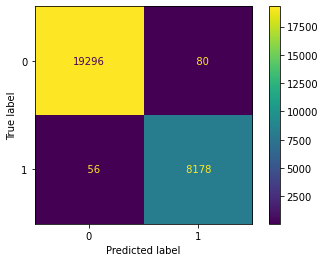

In [14]:
confusionmatrix = plot_confusion_matrix(forest, X_test, y_test, values_format='5d')
print("Model Accuracy: %f" % forest.score(X_test, y_test))  
plt.show()

##Visualizing the first tree in the random forest

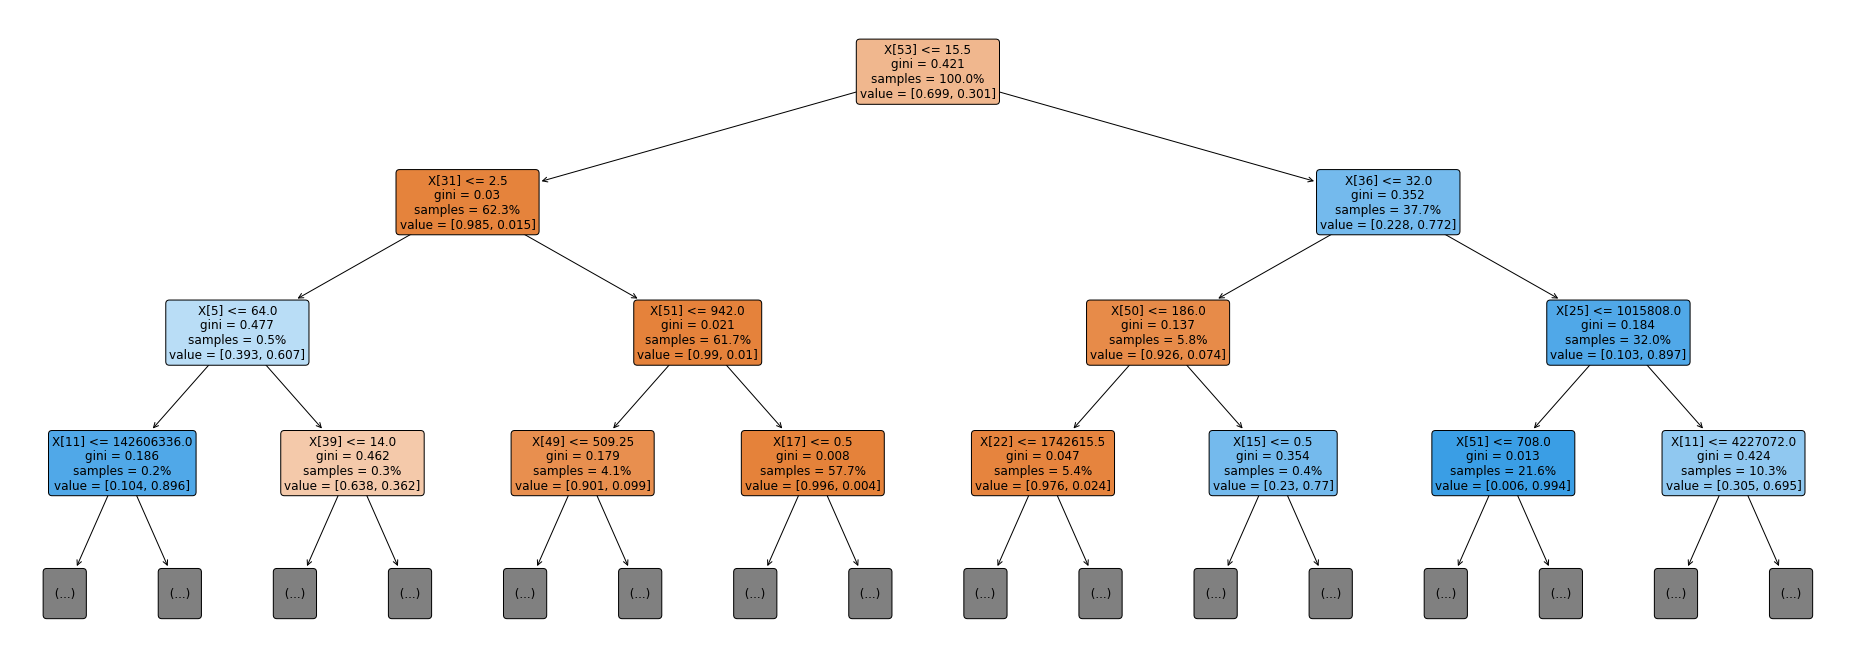

In [15]:
plt.figure(figsize=(33,12))

plot_tree(forest.estimators_[0], max_depth=3, filled=True, proportion=True, rounded=True, fontsize=12)
plt.show()

## Save the model

In [16]:
import pickle

pickle.dump(forest, open('model.pkl', 'wb'))

## Load the model

In [17]:
forest = pickle.load(open('model.pkl', 'rb'))

In [18]:
print(forest)

RandomForestClassifier(oob_score=True)


In [19]:
print(forest.score(X_test, y_test))

0.9950742484607027
